In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('All Earthquakes.csv')

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-01-30T23:41:27.870Z,38.814667,-122.794167,2.77,1.00,md,15.0,68.0,0.006748,0.01,...,2017-01-30T23:43:07.082Z,"5km NW of The Geysers, California",earthquake,0.30,0.56,0.020,5.0,automatic,nc,nc
1,2017-01-30T23:32:12.810Z,33.620500,-116.633333,12.52,0.78,ml,19.0,80.0,0.038290,0.30,...,2017-01-30T23:35:54.456Z,"8km NNE of Anza, CA",earthquake,0.98,1.67,0.366,14.0,automatic,ci,ci
2,2017-01-30T23:13:32.520Z,38.791832,-122.825500,-0.83,1.19,md,6.0,179.0,0.047340,0.10,...,2017-01-30T23:15:14.174Z,"6km WNW of The Geysers, California",earthquake,1.47,3.78,0.190,2.0,automatic,nc,nc
3,2017-01-30T23:07:07.350Z,33.792333,-116.158333,5.40,1.79,ml,51.0,63.0,0.052810,0.19,...,2017-01-30T23:17:49.970Z,"10km NNE of Indio, CA",earthquake,0.24,0.54,0.190,27.0,automatic,ci,ci
4,2017-01-30T23:02:30.680Z,33.791167,-116.152667,5.97,2.62,ml,68.0,63.0,0.057610,0.17,...,2017-01-30T23:29:08.980Z,"10km NE of Indio, CA",earthquake,0.20,0.70,0.228,25.0,automatic,ci,ci


In [4]:
df['time']=pd.to_datetime(df['time'])

In [5]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-01-30 23:41:27.870000+00:00,38.814667,-122.794167,2.77,1.00,md,15.0,68.0,0.006748,0.01,...,2017-01-30T23:43:07.082Z,"5km NW of The Geysers, California",earthquake,0.30,0.56,0.020,5.0,automatic,nc,nc
1,2017-01-30 23:32:12.810000+00:00,33.620500,-116.633333,12.52,0.78,ml,19.0,80.0,0.038290,0.30,...,2017-01-30T23:35:54.456Z,"8km NNE of Anza, CA",earthquake,0.98,1.67,0.366,14.0,automatic,ci,ci
2,2017-01-30 23:13:32.520000+00:00,38.791832,-122.825500,-0.83,1.19,md,6.0,179.0,0.047340,0.10,...,2017-01-30T23:15:14.174Z,"6km WNW of The Geysers, California",earthquake,1.47,3.78,0.190,2.0,automatic,nc,nc
3,2017-01-30 23:07:07.350000+00:00,33.792333,-116.158333,5.40,1.79,ml,51.0,63.0,0.052810,0.19,...,2017-01-30T23:17:49.970Z,"10km NNE of Indio, CA",earthquake,0.24,0.54,0.190,27.0,automatic,ci,ci
4,2017-01-30 23:02:30.680000+00:00,33.791167,-116.152667,5.97,2.62,ml,68.0,63.0,0.057610,0.17,...,2017-01-30T23:29:08.980Z,"10km NE of Indio, CA",earthquake,0.20,0.70,0.228,25.0,automatic,ci,ci


In [6]:
df['Year_month']=df['time'].apply(lambda x: x.strftime('%b-%y')) 

In [7]:
data1=df.groupby('type').count()

In [8]:
data1=data1.reset_index()

In [9]:
data1.head()

,type,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Year_month
0,earthquake,8323,8323,8323,8323,8323,8323,5139,5785,5776,...,8323,8323,4118,8317,5636,5747,8323,8323,8323,8323
1,explosion,58,58,58,58,58,58,34,34,34,...,58,58,34,58,34,34,58,58,58,58
2,ice quake,40,40,40,40,40,40,0,1,1,...,40,40,1,40,1,1,40,40,40,40
3,other event,4,4,4,4,4,4,0,0,0,...,4,4,0,4,0,0,4,4,4,4
4,quarry blast,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51


In [10]:
data1=data1[['type','time']]

### rename the colum

In [11]:
data1.columns.values[1]='count'

In [12]:
data1

,type,count
0,earthquake,8323
1,explosion,58
2,ice quake,40
3,other event,4
4,quarry blast,51


In [13]:
%matplotlib inline 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE3328BC88>],
      dtype=object)

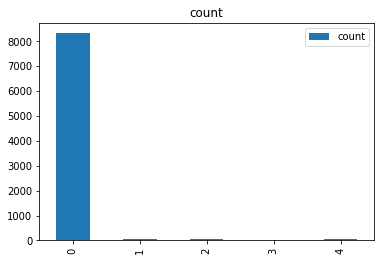

In [14]:
data1.plot(kind='bar',subplots=True,)

# Plotting using Plotly API

In [15]:
import plotly 
import chart_studio.plotly as py
import plotly.graph_objs as go
#Setting plotly credentials
py.sign_in('username','key')

In [16]:
data = [go.Scatter(
        x=data1['type'],
        y=data1['count'],
        name = 'lines+markers'
           
    )
       
       ]
layout = go.Layout(
title='<b>Number Of Calamities</b>',
xaxis=dict(title='Type',color = ('Black')),
yaxis=dict(title='Counts',color = ('Black'))
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Earthquakes')

C:\Users\Gizmo-QA\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning:

Consider using IPython.display.IFrame instead



In [17]:
fig = go.Figure([go.Bar(x=data1['type'], y=data1['count'])])
py.iplot(fig,filename='Earthquakes')

In [18]:
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]

In [19]:
df['text'] = 'Type: '+df['type']  + '<br>' +\
 'Place: '+df['place']

In [20]:
types = data1['type'].tolist()
len(types)

5

#### i was trying with mpl Basemap but could not import the package, then i tried with plotly

In [21]:
import importlib
importlib.import_module('mpl_toolkits').__path__

_NamespacePath(['C:\\Users\\Gizmo-QA\\Anaconda3\\lib\\site-packages\\mpl_toolkits'])

In [22]:
#from mpl_toolkits.basemap import Basemap

## New code:

## finding the latitudes  and longitudes by type

In [23]:
for i in range(len(types)):
    #lim = types[i]
    df_sub = df.loc[df.type==types[i],:]
    print(len(df_sub))

8323
58
40
4
51


In [ ]:
for i in range(len(types)):
    print(types[i])


In [25]:


cases = []
for i in range(len(types)):
    lim = types[i]
    df_sub = df.loc[df.type==types[i],:]
    cases.append(go.Scattergeo(
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        name = types[i] + ' : '+str(len((df_sub))),
        marker = go.scattergeo.Marker(
            color = colors[i],
            sizemode = 'area'
                )
    ) )


In [26]:
    
layout = dict(
        title = '<b>Most Calamities</b>  <br>(Hover for details)',
        #colorbar = True,
        showlegend = True,
        geo = go.layout.Geo(
        showframe = False,
        showcoastlines = True,
        showcountries = True,
        showland = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)"
        
        ),
    )

fig = go.Figure( data=cases, layout=layout )
py.iplot( fig, validate=False, filename='Eqack 1', fileopt='overwrite' )

# Update(Oct 8): Updated the code with latest plot.ly references. Thanks to Mai (@maihao14) for pointing out the issue